In [5]:
import open3d as o3d
import matplotlib.pyplot as plt

INFO - 2021-11-30 10:24:22,190 - font_manager - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Could not set the fontsize (error code 0x17)
INFO - 2021-11-30 10:24:22,226 - font_manager - generated new fontManager


In [15]:
print("SRN chair dataset")
color_raw = o3d.io.read_image("/eva_data_0/multi_obj_eva/val_chair_0002/000000.png")
depth_raw = o3d.io.read_image("/eva_data_0/multi_obj_eva/val_chair_0002/000000_depth_norm.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

SRN chair dataset
RGBDImage of size 
Color image : 128x128, with 1 channels.
Depth image : 128x128, with 1 channels.
Use numpy.asarray to access buffer data.


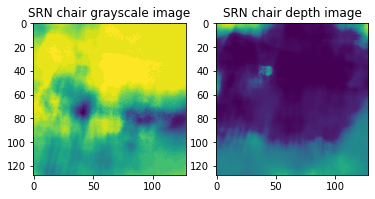

In [16]:
plt.subplot(1, 2, 1)
plt.title('SRN chair grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('SRN chair depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [19]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
# pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [17]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry([pcd])
o3d.visualization.ViewControl.set_zoom(vis.get_view_control(), 0.8)
vis.run()

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW


TypeError: add_geometry(): incompatible function arguments. The following argument types are supported:
    1. (self: open3d.cpu.pybind.visualization.Visualizer, geometry: open3d.cpu.pybind.geometry.Geometry, reset_bounding_box: bool = True) -> bool

Invoked with: Visualizer with name Open3D, [PointCloud with 14832 points.]